In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Fictional parameters
P0 = 100 #initial price
dt = 1/252
mu = 0.001 #drift
sigma = 0.02 #standard deviation of the asset's price
n_steps = 1000 #number of days in total
spread = 0.002 #fictionnal spread between bid and ask price
cash = 50 #Initial amount of cash the trader has
initial_wealth = 0 #Initial wealth of the trader
positions = 0 #Initial positions of the trader
inventory = 0 #initial inventory of assets of the trader

shocks = np.random.normal(0,1,n_steps) #Random shocks generated with a normal law
prices = [P0]

In [3]:
#Generating random prices from P0 using Geoometric Brownian motion (GBM)
for eps in shocks:
    new_price = prices[-1]*np.exp((mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*eps)
    prices.append(new_price)
    
df = pd.DataFrame({'time': range(len(prices)), 'market price': prices})

In [4]:
df['bid'] = np.nan
df['ask'] = np.nan
df['inventory'] = 0
df['PnL'] = 0.0

df['bid'] = df['market price']*(1 - spread/2)
df['ask'] = df['market price']*(1 + spread/2)

p_buy = 0.5 #Probability that a client buys
p_sell = 1-p_buy #Probability that a client sells

In [8]:
#Simulating orders
for i in range(len(df)):
    order_type = np.random.choice(['buy','sell'], p=[p_buy,p_sell])
    order_size = np.random.randint(1,10)
    market_price = df.at[i,'market price']
    bid = df.at[i,'bid']
    ask = df.at[i,'ask']
    if order_type == 'buy':
        inventory -= order_size
        cash += ask*order_size
        positions -= order_size
    if order_type == 'sell':
        inventory += order_size
        cash -= bid*order_size
        positions += order_size
    df.at[i, 'inventory'] = inventory
    df.at[i,'PnL'] = cash + inventory*market_price - initial_wealth

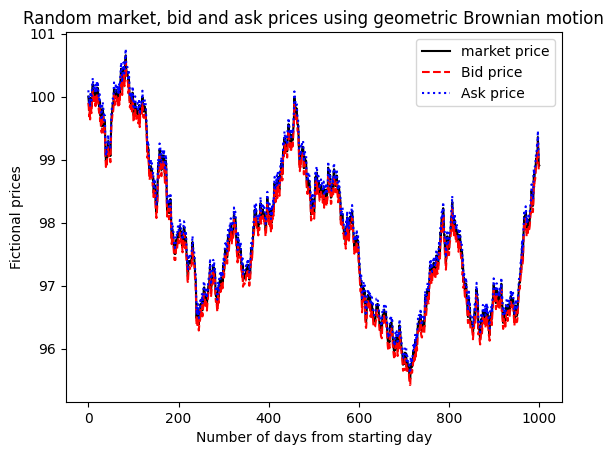

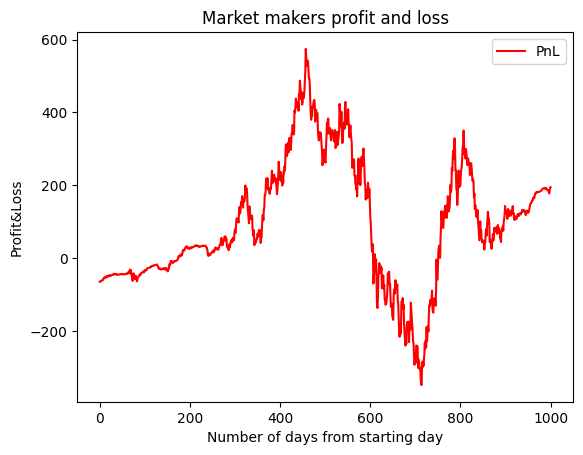

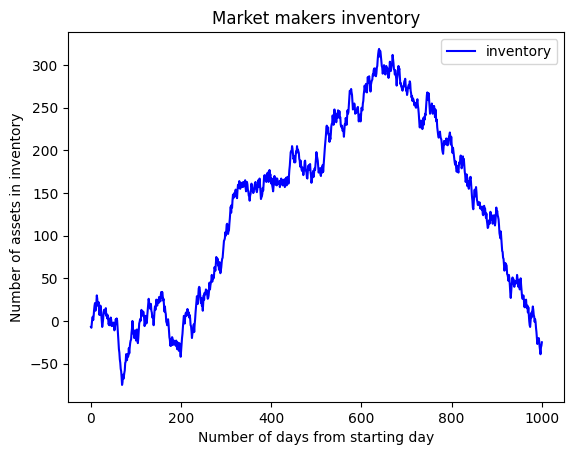

In [9]:
#Visualisation
plt.figure()
plt.plot(df.index, df['market price'], color='black', label='market price')
plt.plot(df.index, df['bid'], color='red', linestyle='--', label='Bid price')
plt.plot(df.index, df['ask'], color='blue', linestyle='dotted',label='Ask price')
plt.xlabel('Number of days from starting day')
plt.ylabel('Fictional prices')
plt.title('Random market, bid and ask prices using geometric Brownian motion')
plt.legend()
plt.show()

plt.figure()
plt.plot(df.index, df['PnL'], color='red', label='PnL')
plt.xlabel('Number of days from starting day')
plt.ylabel('Profit&Loss')
plt.title('Market makers profit and loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(df.index, df['inventory'], color='blue', label='inventory')
plt.xlabel('Number of days from starting day')
plt.ylabel('Number of assets in inventory')
plt.title('Market makers inventory')
plt.legend()
plt.show()